In [1]:
import sys
sys.path.insert(1, '../../functions')
import importlib
import numpy as np
import nbformat
import plotly.express
import plotly.express as px
import pandas as pd
import scipy.optimize as optimization
import matplotlib.pyplot as plt
import food_bank_functions
import food_bank_bayesian
from food_bank_functions import *
from food_bank_bayesian import *
importlib.reload(food_bank_functions)
importlib.reload(food_bank_bayesian)

<module 'food_bank_bayesian' from '../../functions\\food_bank_bayesian.py'>

In [3]:
weights = [928, 1200, 420, 429, 103, 393]
weights = (weights / np.sum(weights)) * 100
county = ['Broome', 'Steuben', 'Chemung', 'Tioga', 'Schuyler', 'Tompkins']

In [4]:
print(weights)

[26.72041463 34.55226029 12.0932911  12.35243305  2.96573568 11.31586525]


In [5]:
data_support = []
data_weights = []

i = 0
for town in county:
    print(i)
    print(town)
    variance = 2
    num_bins = 20
    samples = np.random.normal(weights[i], variance, 100000)
    
    min_samples = max(1, np.floor(min(samples)))
    max_samples = np.ceil(max(samples))
    print(min_samples, max_samples)
    
    bins = np.digitize(samples, np.arange(min_samples, max_samples+1, (max_samples - min_samples + 1) / num_bins))
    support = np.arange(min_samples, max_samples+1, (max_samples - min_samples + 1) / num_bins)
    support = np.append(support, max(samples))
    print(support)
    vals = np.zeros(len(support))

    for j in bins:
        vals[j] += 1
    vals = vals / np.sum(vals)
    data_support.append(support)
    data_weights.append(vals)
    i += 1

0
Broome
17.0 36.0
[17.         18.         19.         20.         21.         22.
 23.         24.         25.         26.         27.         28.
 29.         30.         31.         32.         33.         34.
 35.         36.         35.96340382]
1
Steuben
26.0 46.0
[26.        27.05      28.1       29.15      30.2       31.25
 32.3       33.35      34.4       35.45      36.5       37.55
 38.6       39.65      40.7       41.75      42.8       43.85
 44.9       45.95      45.3699566]
2
Chemung
3.0 21.0
[ 3.          3.95        4.9         5.85        6.8         7.75
  8.7         9.65       10.6        11.55       12.5        13.45
 14.4        15.35       16.3        17.25       18.2        19.15
 20.1        21.05       20.85426391]
3
Tioga
3.0 22.0
[ 3.          4.          5.          6.          7.          8.
  9.         10.         11.         12.         13.         14.
 15.         16.         17.         18.         19.         20.
 21.         22.         21.29455615]

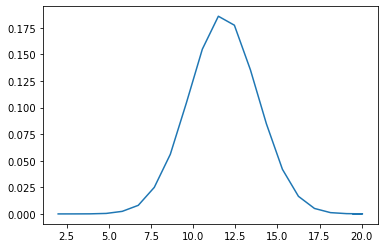

In [8]:
i = 5
plt.plot(data_support[i], data_weights[i])

In [34]:
# np.savetxt('../../data/fbst_synthetic/vals.csv', data_weights, delimiter=',')
# np.savetxt('../../data/fbst_synthetic/support.csv', data_support, delimiter=',')
